In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [7]:
df = pd.read_csv('self/sales_analysis.csv')
df

,sale_time,purchaser_gender
0,10/1/2012 1:42,female
1,10/1/2012 2:24,female
2,10/1/2012 2:25,female
3,10/1/2012 2:30,female
4,10/1/2012 2:51,male
...,...,...
204324,9/15/2013 23:30,female
204325,9/15/2013 23:42,female
204326,9/15/2013 23:43,male
204327,9/15/2013 23:43,male


In [14]:
# assign a constant figure size and use it in plotting to make plots larger
FIG_SIZE = (8,6)

# Assignment

1.Plot daily sales for all 50 weeks.
2.It looks like there has been a sudden change in daily sales. What date did it occur?
3.Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?
4.Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).
5.Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM - 12:00PM), afternoon (12:00PM - 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?


# Question 1

Plot daily sales for all 50 weeks.



In [8]:
sale_day = pd.to_datetime(df['sale_time'])


In [9]:
daily_sales_df = sale_day.groupby(sale_day.dt.floor('d')).size().reset_index(name='sales_amount')
daily_sales_df.rename(columns={'sale_time':'sale_day'},inplace=True)
daily_sales_df.head()

,sale_day,sales_amount
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476


In [12]:
#  to use index in plotting make sale_day index
daily_sales_df.index = daily_sales_df['sale_day']
daily_sales_df.drop(columns = ['sale_day'],inplace = True)

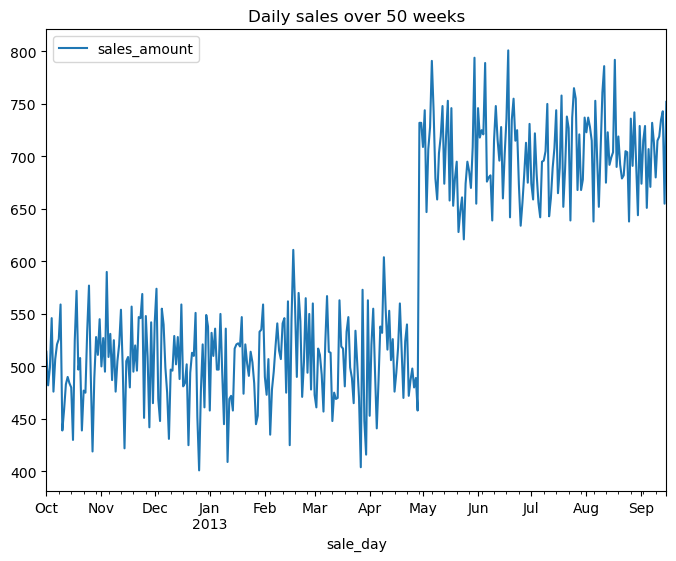

In [15]:
#Show daily sales for all 50 weeks
daily_sales_df.plot(figsize = FIG_SIZE,title = "Daily sales over 50 weeks")
plt.show()

# Question 2

It looks like there has been a sudden change in daily sales. What date did it occur?



In [ ]:
#compare the pressent sales and privious Sales



In [17]:
daily_sales_df['privious_sales'] = [None] + daily_sales_df['sales_amount'].to_list()[:-1]
daily_sales_df['c'] = daily_sales_df['sales_amount'] - daily_sales_df['privious_sales']
daily_sales_df.head()


,sales_amount,privious_sales,Deference_sales_amount
sale_day,,,
2012-10-01,514,NaN,NaN
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0


# Question 3

Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?

In [24]:
#scipy.stat
from scipy import stats

In [25]:
# first drop all nan values (if any) for the test 
daily_sales_df.dropna(inplace = True)
#then compair the max change
stats.ttest_1samp(daily_sales_df['sales_amount'],732)

TtestResult(statistic=-26.273266340051002, pvalue=1.3019593251472396e-84, df=348)

The obtained p-value as the result of the t-test is 1.3019593251472396e-84 which is lower than 0.05 (we can assume the threshold as 0.05 as common practice). It leads to decide this particular date is important for us.

# Question 4

Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

In [27]:
# create gender_portions_df to analyze sales distribution over genders
df['sale_day'] = pd.to_datetime(df['sale_time']).dt.floor('d')
gender_portions_df = df.groupby(['sale_day', 'purchaser_gender']).size().reset_index(name='sales_amount')

In [28]:
gender_portions_df


,sale_day,purchaser_gender,sales_amount
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386
...,...,...,...
695,2013-09-13,male,537
696,2013-09-14,female,193
697,2013-09-14,male,462
698,2013-09-15,female,230


In [29]:
# calculate female and male sales amount separately
new_df = pd.DataFrame(gender_portions_df['sale_day'].unique(),columns=['sale_day'])
new_df['female_sales_amount'] = pd.Series(gender_portions_df[gender_portions_df.purchaser_gender == 'female']['sales_amount']).reset_index(drop=True)
new_df['male_sales_amount'] = pd.Series(gender_portions_df[gender_portions_df.purchaser_gender == 'male']['sales_amount']).reset_index(drop=True)
new_df[-5:]

,sale_day,female_sales_amount,male_sales_amount
345,2013-09-11,224,495
346,2013-09-12,225,510
347,2013-09-13,206,537
348,2013-09-14,193,462
349,2013-09-15,230,522


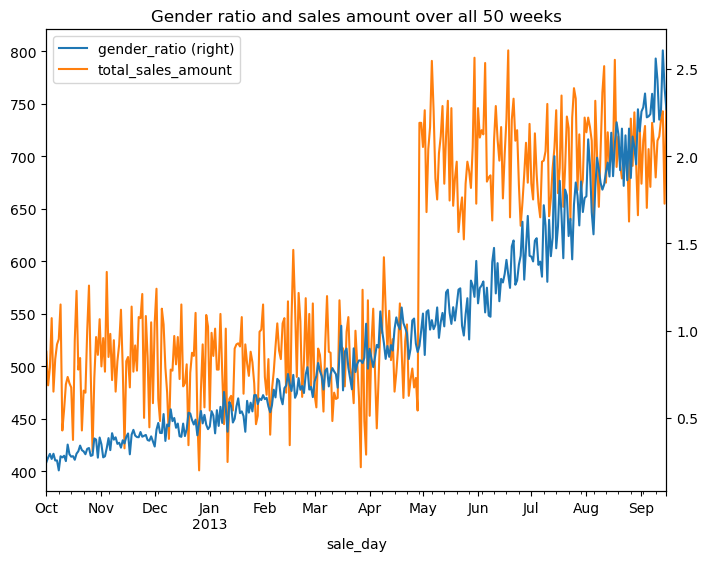

In [30]:
# calculate gender ratio of sales
new_df['gender_ratio'] = new_df['male_sales_amount']/new_df['female_sales_amount']

# plot gender ratio change over 50 weeks with the total sales amount
# observe if there is a correlation between them
plot_df = new_df.copy()
plot_df['total_sales_amount']  = plot_df['male_sales_amount'] + plot_df['female_sales_amount']
plot_df.drop(columns=['female_sales_amount', 'male_sales_amount'], inplace=True)
plot_df.index = plot_df['sale_day']
plot_df.drop(columns=['sale_day'], inplace=True)
plot_df.plot(secondary_y = ['gender_ratio'],figsize=FIG_SIZE, title= "Gender ratio and sales amount over all 50 weeks")
plt.show()

# Question 5

Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM to 12:00PM), afternoon (12:00PM to 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?

In [31]:
# extract sale hour to divide sales 
df['sale_hour']  = pd.to_datetime(df['sale_time']).dt.ceil('h').dt.hour
df.dtypes

sale_time                   object
purchaser_gender            object
sale_day            datetime64[ns]
sale_hour                    int64
dtype: object

In [33]:
# define a function to apply sale hour column to decide a part of day based on the mentioned logic
def assign_day_part(sale_hour):
    """Assign labels based on sale hour."""
    if sale_hour >= 6 and sale_hour < 12:
        return 'morning'
    if sale_hour >= 12 and sale_hour < 18:
        return 'afternoon'
    if sale_hour >= 18 and sale_hour < 24:
        return 'evening'
    if sale_hour >= 0 and sale_hour < 6:
        return 'night'

In [34]:
# apply the defined function and create day_part column
df['day_part'] = df['sale_hour'].apply(assign_day_part)

# drop unnecessary columns
df.drop(columns = ['purchaser_gender', 'sale_hour', 'sale_time'], inplace= True)


In [35]:
# calculate sales amount per day part
df_pct_sales = df.groupby(df.day_part).size().reset_index(name='day_part_sales_amount')

# calculate sales amount percentage per day part
df_pct_sales['day_part_sales_percentage'] = df_pct_sales['day_part_sales_amount'] / df_pct_sales['day_part_sales_amount'].sum()

In [36]:
df_pct_sales


,day_part,day_part_sales_amount,day_part_sales_percentage
0,afternoon,81161,0.397207
1,evening,53366,0.261177
2,morning,56180,0.274949
3,night,13622,0.066667
